In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pymc3 as pm

data = pd.read_csv("./EUR_USD_data.csv")
print(data.head())

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\salee\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


        Date   Price    Open    High     Low  per_change  Days
0  28-Oct-14  1.2734  1.2698  1.2765  1.2683      0.0028     0
1  29-Oct-14  1.2632  1.2735  1.2772  1.2631     -0.0080     1
2  30-Oct-14  1.2613  1.2631  1.2640  1.2547     -0.0015     2
3  31-Oct-14  1.2525  1.2612  1.2618  1.2485     -0.0070     3
4   3-Nov-14  1.2483  1.2515  1.2517  1.2441     -0.0034     4


In [2]:
X = data.loc[:, ['Open', 'High', 'Low']]
y = data.ix[:,'Price']

C:\Users\salee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


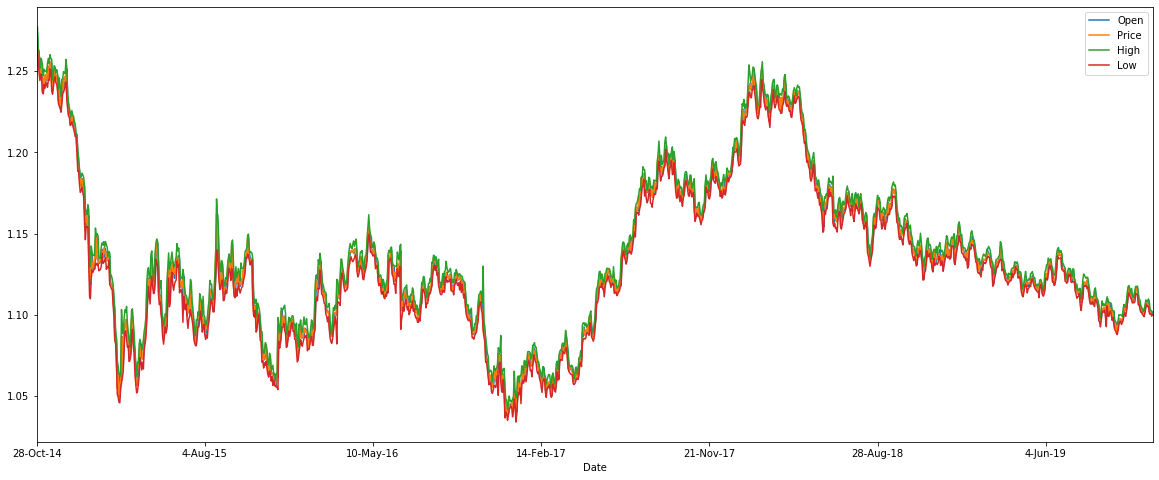

In [3]:
plt.figure(figsize=(20,8))
ax=plt.gca()
data.plot(kind='line',x='Date',y='Open',ax=ax)
data.plot(kind='line',x='Date',y='Price',ax=ax)
data.plot(kind='line',x='Date',y='High',ax=ax)
data.plot(kind='line',x='Date',y='Low',ax=ax)
plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
data['PCA_data'] = pca.fit_transform(X)
data.head()
# X=pd.DataFrame(X)

,Date,Price,Open,High,Low,per_change,Days,PCA_data
0,28-Oct-14,1.2734,1.2698,1.2765,1.2683,0.0028,0,0.238415
1,29-Oct-14,1.2632,1.2735,1.2772,1.2631,-0.0080,1,0.237954
2,30-Oct-14,1.2613,1.2631,1.2640,1.2547,-0.0015,2,0.219482
3,31-Oct-14,1.2525,1.2612,1.2618,1.2485,-0.0070,3,0.213534
4,3-Nov-14,1.2483,1.2515,1.2517,1.2441,-0.0034,4,0.199564


In [5]:
# X.head()
data['data_bins']=pd.cut(data['PCA_data'],15)
data['data_bins'].unique()

[(0.212, 0.238], (0.185, 0.212], (0.158, 0.185], (0.131, 0.158], (0.104, 0.131], ..., (-0.0567, -0.0299], (-0.0835, -0.0567], (-0.11, -0.0835], (-0.137, -0.11], (-0.164, -0.137]]
Length: 15
Categories (15, interval[float64]): [(-0.164, -0.137] < (-0.137, -0.11] < (-0.11, -0.0835] < (-0.0835, -0.0567] ... (0.131, 0.158] < (0.158, 0.185] < (0.185, 0.212] < (0.212, 0.238]]

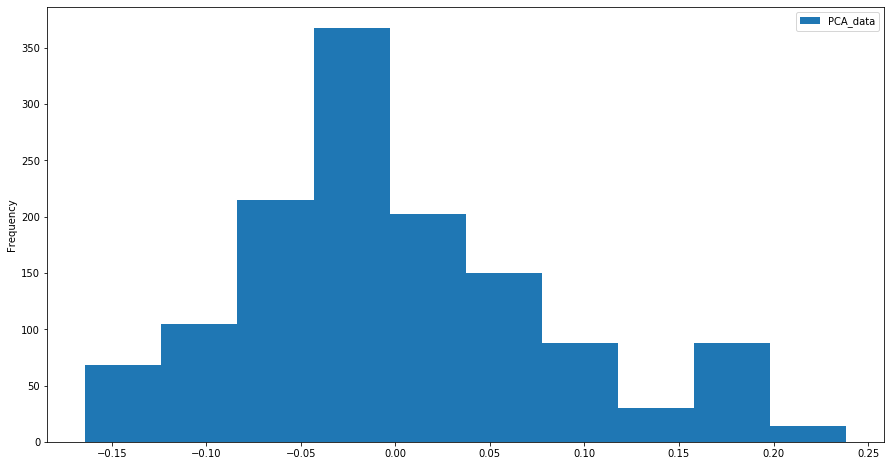

In [6]:
plt.figure(figsize=(15,8))
ax=plt.gca()
data.plot(kind='hist',x='data_bins', y='PCA_data',ax=ax)
plt.show()